In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
from sklearn.metrics import plot_confusion_matrix

In [21]:
model = RandomForestClassifier(max_depth=15)

## The modifications of the data set (data0 =data_modeling.csv). This is the original data set

  ### We have to drop the categorical columns.
    * "R_fighter","B_fighter", "Referee", "date","location"
        
### We applied an OrdinalEncoder to the weight_class
### We applied and label_encoder to the B_Stance and R_Stance
### We dropped from winner the Draw results because did not help us for the prediction and after we chaged to binary  1=Red Winner , 0= Blue Winner
### In this data set all the Null values were replaced and deleted.

In [42]:
data0=pd.read_csv("data/data_modeling.csv", index_col=None) # Original Data set

In [43]:
data0.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [44]:
data0.drop(columns=[ "R_fighter","B_fighter", "Referee", "date","location"], inplace=True)

In [45]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["Strawweight","Women's Strawweight", "Flyweight","Women's Flyweight", "Bantamweight","Women's Bantamweight","Featherweight","Women's Featherweight",
                                      "Lightweight","Welterweight","Middleweight","Light Heavyweight","Heavyweight","Open Weight","Catch Weight"]],dtype=np.int8)
data0['weight_class'] = encoder.fit_transform(data0['weight_class'].values.reshape(-1, 1))

In [48]:
from sklearn import preprocessing
def label_encoder(df,col):
    le = preprocessing.LabelEncoder()
    transformed = le.fit_transform(df[col])
    df[col] = transformed

In [49]:
label_encoder(data0,"R_Stance")
label_encoder(data0,"B_Stance")

In [50]:
data0.title_bout=[0 if value == False else 1 for value in data0["title_bout"]]  # 0=False , 1=True

In [51]:
data0.drop(data0[data0.Winner == "Draw"].index, inplace=True)

In [52]:
data0["Winner"]= [0 if value == "Blue" else 1 for value in data0["Winner"]] # 1=Red, 0=Blue

In [53]:
data0.head()

,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,1,1,4,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,...,2.0,0.0,0.0,8.0,1,162.56,162.56,135.0,31.0,32.0
1,1,1,3,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,...,0.0,2.0,0.0,5.0,2,165.10,167.64,125.0,32.0,31.0
2,1,0,8,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,...,3.0,6.0,1.0,14.0,1,180.34,193.04,155.0,36.0,35.0
3,0,0,4,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,...,1.0,0.0,0.0,6.0,1,162.56,172.72,135.0,26.0,29.0
4,0,0,12,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,...,2.0,0.0,0.0,3.0,2,187.96,190.50,264.0,32.0,26.0


In [55]:
X0=data0.drop('Winner',axis=1,inplace=False)
y0 = data0['Winner']

X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.2, random_state=43)

In [56]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15)

In [57]:
model.score(X_test, y_test)

0.6646525679758308

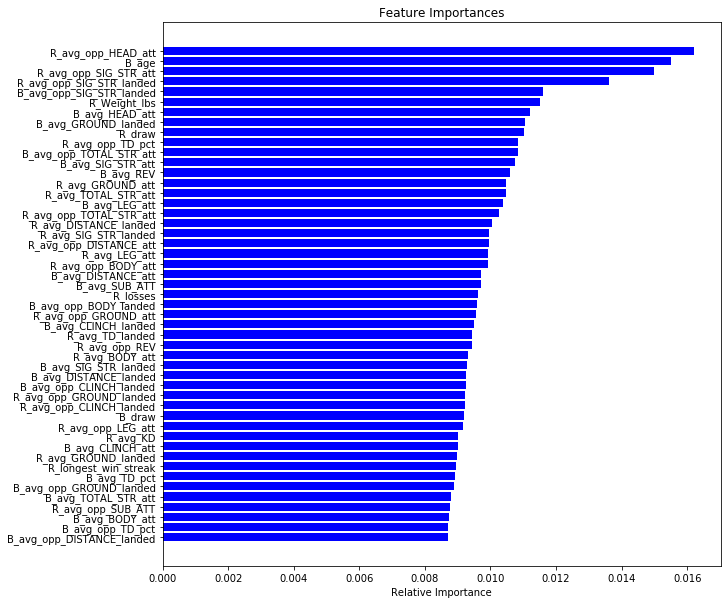

In [58]:
features = data0.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-49:]  # top 30 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### The conclusion from the original data set, We need to improve the accuracy, the next step will be to add more columns to see if we can improve the results

## The modifications of the data set (data =model_numeric.csv)

  ### We have to drop some unnecessary columns and add another ones to see if we could improve the result.
    * "title_bout","B_current_lose_streak","R_current_lose_streak"
        
### We applied an OrdinalEncoder to the weight_class
### We applied and OneHotEncoder to the B_Stance and R_Stance (10 columns more)
### We dropped from winner the Draw results because did not help us for the prediction and after we chaged to binary  1=Red Winner , 0= Blue Winner
### In this data set all the Null values were replaced and deleted.
### We created two new columns (weight_diff_red-blue and height_diff_red-blue)

In [7]:
data=pd.read_csv("data/model_numeric.csv", index_col=None) # More columns

In [13]:
data.head()

,Winner,weight_class,no_of_rounds,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,...,"('R_Open_Stance',)","('R_Orthodox',)","('R_Sideways',)","('R_Southpaw',)","('R_Switch',)","('B_Open_Stance',)","('B_Orthodox',)","('B_Sideways',)","('B_Southpaw',)","('B_Switch',)"
0,1,4.0,5.0,4.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,3.0,5.0,3.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,8.0,3.0,3.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,4.0,3.0,4.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,12.0,3.0,1.0,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
data.dropna(axis=0, how='any', inplace=True)

In [15]:
data.shape

(3307, 146)

In [12]:
data.drop(columns=[ "title_bout","B_current_lose_streak","R_current_lose_streak"], inplace=True)

In [16]:
X=data.drop('Winner',axis=1,inplace=False)
y = data['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [17]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, random_state=1)

In [18]:
model.score(X_test, y_test)

0.649546827794562

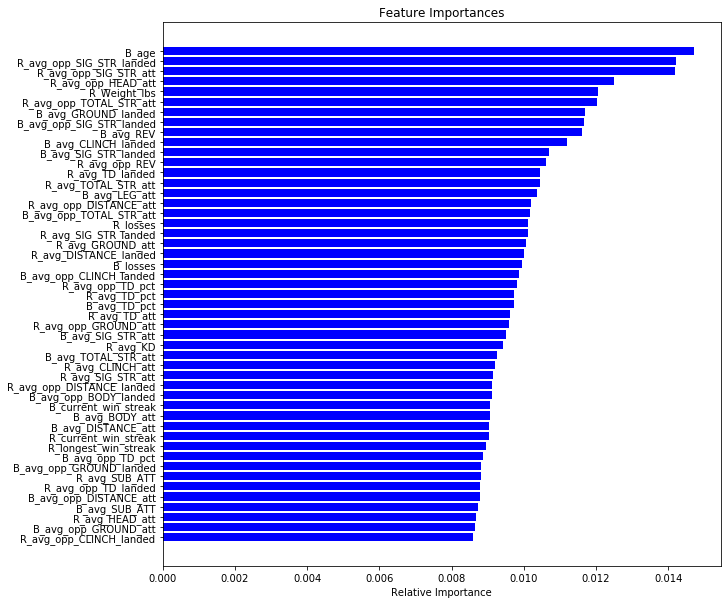

In [19]:
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-49:]  # top 30 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### The conclusion from this data set (data =model_numeric.csv), we thought that if we created more columns the machine will work better but it did not, there is too many unnecessary data that not help us to improve the accuracy. We will not continue using this data set for modeling pourpose. The next we will use less columns to see how it is works.

## The modifications of the data set (data1 =modeling_numeric.csv)

  ### We have to drop some unnecessary columns that we saw in the feature_importances_.
    * "R_fighter","B_fighter","Referee","date","location","R_draw","B_draw","no_of_rounds","R_wins","B_wins",
    * "R_losses","B_losses","B_total_title_bouts","R_total_title_bouts","R_total_rounds_fought","B_total_rounds_fought",           * "R_total_time_fought(seconds)","B_total_time_fought(seconds)","R_longest_win_streak","B_longest_win_streak",
    * "R_current_lose_streak","B_current_lose_streak",'R_win_by_Decision_Majority','R_win_by_Decision_Split',
    * 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO',"R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage',
    * "B_current_win_streak",'B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous',
    * 'B_win_by_KO/TKO', 'B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage',"title_bout",
    * "R_current_win_streak",'R_Stance','B_Stance'
    
 ### We applied an OrdinalEncoder to the weight_class
 ### We dropped from winner the Draw results because did not help us for the prediction and after we chaged to binary  1=Red Winner , 0= Blue Winner
 ### In this data set all the Null values were replaced and deleted.
 ### We created two new columns (weight_diff_red-blue and height_diff_red-blue)

In [73]:
data1=pd.read_csv("data/modeling_numeric.csv", index_col=None) # Less Columns

In [29]:
from sklearn.metrics import plot_roc_curve;

In [74]:
data1.head()

,Winner,title_bout,weight_class,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_diff_red-blue,height_diff_red-blue
0,1,1,4,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,...,0.050000,110.500000,43.300000,162.56,162.56,135.0,31.0,32.0,0.0,-5.08
1,1,1,3,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,...,0.147143,158.142857,82.285714,165.10,167.64,125.0,32.0,31.0,0.0,-2.54
2,1,0,8,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,...,0.131333,102.133333,38.600000,180.34,193.04,155.0,36.0,35.0,0.0,-5.08
3,0,0,4,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,...,0.000000,115.125000,48.875000,162.56,172.72,135.0,26.0,29.0,0.0,-7.62
4,0,0,12,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,0.000000,...,0.000000,60.500000,27.750000,187.96,190.50,264.0,32.0,26.0,14.0,7.62


In [75]:
data1.drop(columns=[ "title_bout"], inplace=True)

In [59]:
data1.drop(columns=[ "weight_diff_red-blue","height_diff_red-blue"], inplace=True)

In [98]:
X1=data1.drop('Winner',axis=1,inplace=False)
y1 = data1['Winner']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=43)

In [99]:
model.fit(X_train1,y_train1)

RandomForestClassifier(max_depth=15)

In [100]:
model.score(X_test1, y_test1)

0.6807738814993954

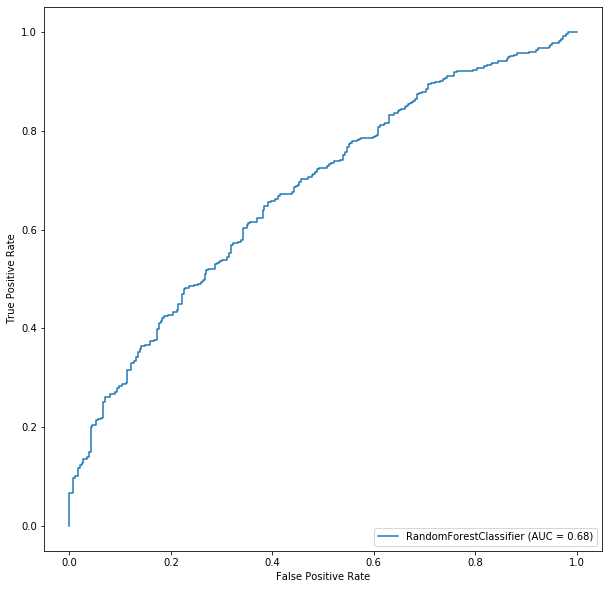

In [101]:
plot_roc_curve(model,X_test1,y_test1);

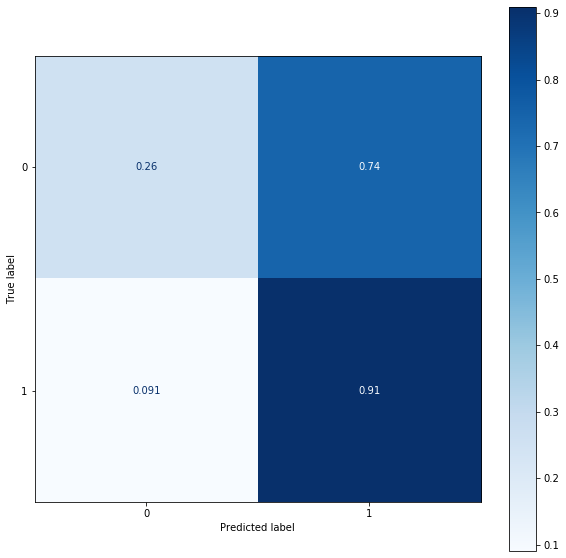

In [104]:
predictions = model.predict(X_test1)

# Generate confusion matrix
matrix = plot_confusion_matrix(model, X_test1, y_test1,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [105]:
y_pred = model.predict(X_test1) #1=Red, 0=Blue
print(classification_report(y_test1, y_pred ))

              precision    recall  f1-score   support

           0       0.60      0.26      0.36       289
           1       0.69      0.91      0.79       538

    accuracy                           0.68       827
   macro avg       0.65      0.58      0.57       827
weighted avg       0.66      0.68      0.64       827



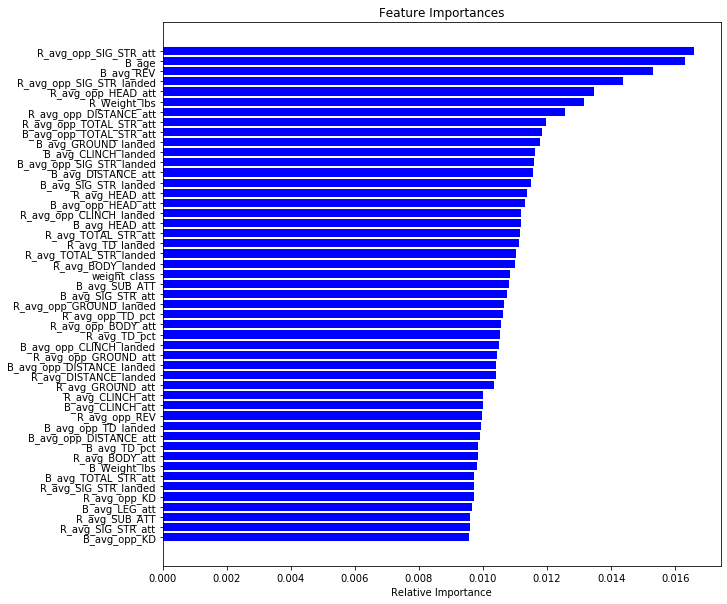

In [26]:
features = data1.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-49:]  # top 30 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Visualization of the Data

In [38]:
from sklearn.manifold import TSNE

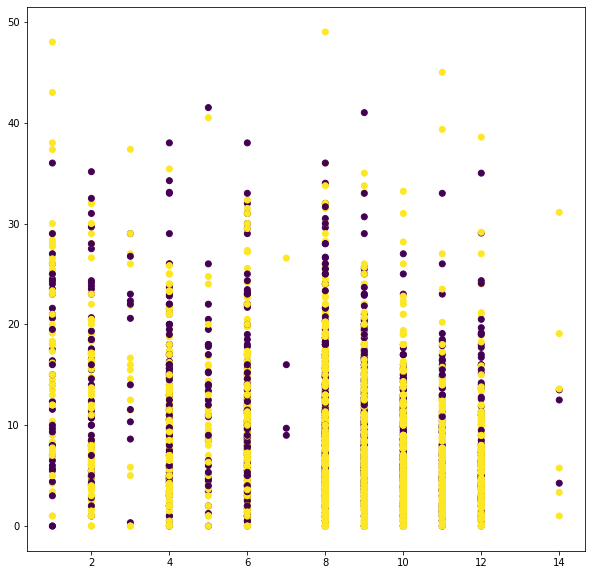

In [102]:
plt.scatter(X.values[:,0],X.values[:,1], c=y); # original data

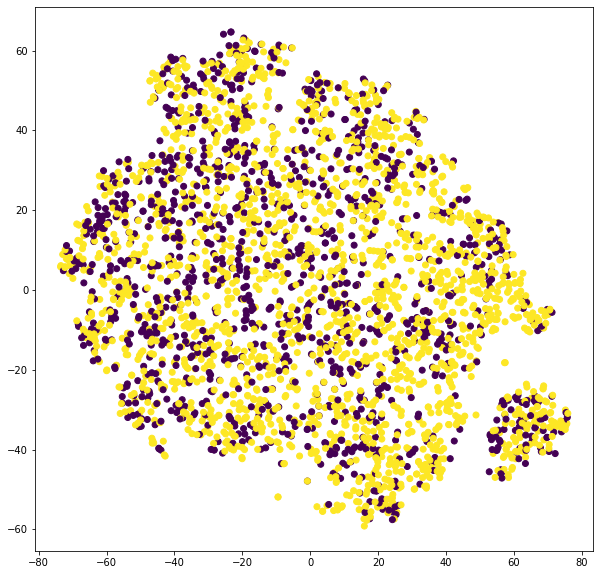

In [103]:
X_red = TSNE().fit_transform(X)
plt.scatter(X_red[:,0],X_red[:,1], c=y); # Data with TSNE

### The conclusion from this data set(data1 =modeling_numeric.csv), We deleted a lots of columns to see how improve the accuracy, we got a little bit of improvement. We will consider this data set for another type of model.

In [106]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,12,15,17],
    'max_features': [5],
    'n_estimators': [100,300,500], 
    'criterion': ['gini', 'entropy']
}

In [107]:
model_sel = GridSearchCV(model,param_grid)

In [37]:
X=data1.drop('Winner',axis=1,inplace=False) # I applied the grid search to the second data set to see how are the best parameter
y = data1['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

In [108]:
model_sel.fit(X_train1, y_train1)

GridSearchCV(estimator=RandomForestClassifier(max_depth=15),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 17], 'max_features': [5],
                         'n_estimators': [100, 300, 500]})

In [110]:
model_sel.best_estimator_.score(X_test1, y_test1)

0.6626360338573156

In [111]:
model_sel.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 5,
 'n_estimators': 300}

### Classification report

In [113]:
y_pred = model_sel.predict(X_test1) #1=Red, 0=Blue

In [114]:
print(classification_report(y_test1, y_pred ))

              precision    recall  f1-score   support

           0       0.57      0.15      0.24       289
           1       0.67      0.94      0.78       538

    accuracy                           0.66       827
   macro avg       0.62      0.54      0.51       827
weighted avg       0.64      0.66      0.59       827



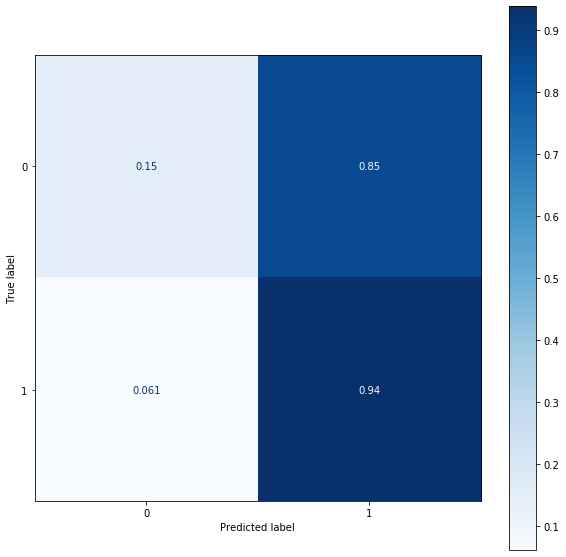

In [115]:
predictions = model_sel.predict(X_test1)

# Generate confusion matrix
matrix = plot_confusion_matrix(model_sel, X_test1, y_test1,
                                 cmap=plt.cm.Blues,
                                 normalize='true')